In [1]:
import torch

def zero_top_percent(tensor, percent):
    """
    将输入的二维torch.Tensor中数值大小在总体的前percent%的那些点都变成0。

    参数:
    - tensor: 二维的n*n的torch.Tensor。
    - percent: 一个百分比，决定了需要将多少比例的最大值变为0。

    返回:
    - 一个新的二维torch.Tensor，其中指定百分比的最大值已经被设置为0。
    """
    # 确保输入是二维的
    if tensor.dim() != 2:
        raise ValueError("输入必须是一个二维的torch.Tensor。")

    # 将tensor展平并排序
    flat_tensor = tensor.flatten()
    sorted_tensor, indices = torch.sort(flat_tensor, descending=True)
    
    # 计算需要变为0的元素数量
    num_elements_to_zero = int(len(flat_tensor) * percent / 100)
    
    # 获取需要变为0的元素的阈值
    if num_elements_to_zero > 0:
        threshold = sorted_tensor[num_elements_to_zero - 1]
    else:
        threshold = sorted_tensor[0] + 1  # 如果percent为0，则选择一个大于所有元素的阈值
    
    # 将原始tensor中所有大于等于阈值的元素设置为0
    tensor[tensor >= threshold] = 0
    
    return tensor

# 示例
n = 4
percent = 25
tensor = torch.tensor([[1.2, 2, 3, 4],
                       [5., 6, 7, 8],
                       [9., 10., 11, 12],
                       [13., 14., 15, 16]])

print("原始tensor:")
print(tensor)

result_tensor = zero_top_percent(tensor, percent)
print("\n修改后的tensor:")
print(result_tensor)


原始tensor:
tensor([[ 1.2000,  2.0000,  3.0000,  4.0000],
        [ 5.0000,  6.0000,  7.0000,  8.0000],
        [ 9.0000, 10.0000, 11.0000, 12.0000],
        [13.0000, 14.0000, 15.0000, 16.0000]])

修改后的tensor:
tensor([[ 1.2000,  2.0000,  3.0000,  4.0000],
        [ 5.0000,  6.0000,  7.0000,  8.0000],
        [ 9.0000, 10.0000, 11.0000, 12.0000],
        [ 0.0000,  0.0000,  0.0000,  0.0000]])


In [2]:
import torch

def zero_top_percent_with_mask(tensor, percent):
    """
    将输入的二维torch.Tensor中数值大小在总体的前percent%的那些点都变成0，并返回一个mask，
    其中值为True的位置表示原张量中被清零的位置。

    参数:
    - tensor: 二维的n*n的torch.Tensor。
    - percent: 一个百分比，决定了需要将多少比例的最大值变为0。

    返回:
    - modified_tensor: 修改后的二维torch.Tensor。
    - mask: 一个布尔型的二维torch.Tensor，其中True的位置表示原张量中被清零的位置。
    """
    if tensor.dim() != 2:
        raise ValueError("输入必须是一个二维的torch.Tensor。")

    flat_tensor = tensor.flatten()
    sorted_tensor, indices = torch.sort(flat_tensor, descending=True)
    
    num_elements_to_zero = int(len(flat_tensor) * percent / 100)
    
    if num_elements_to_zero > 0:
        threshold = sorted_tensor[num_elements_to_zero - 1]
    else:
        threshold = sorted_tensor[0] + 1
    
    mask = tensor >= threshold
    modified_tensor = tensor.clone()
    modified_tensor[mask] = 1
    
    return modified_tensor, mask

# 示例
n = 4
percent = 25
tensor = torch.tensor([[1, 2, 3, 4],
                       [5, 6, 7, 8],
                       [9, 10, 11, 12],
                       [13, 14, 15, 16]], dtype=torch.float32)

In [3]:
def flatten_and_std(tensor):
    """
    接受一个二维的PyTorch张量，将其拉直成一个向量，然后计算这个向量的标准差。

    参数:
        tensor (torch.Tensor): 输入的二维张量。

    返回:
        float: 计算得到的标准差。
    """
    # 将张量拉直
    flat_tensor = tensor.flatten()
    
    # 计算标准差
    std_dev = flat_tensor.std()

    return float(std_dev)

In [4]:
import os
import pickle

def save_as_pkl(var, file_name: str = "output"):
    original_file_name = file_name
    counter = 1
    # 检查文件是否存在，如果存在，尝试增加数字直到找到一个不存在的文件名
    while os.path.exists(f"{file_name}.pkl"):
        counter += 1
        file_name = f"{original_file_name}({counter})"
    with open(f"{file_name}.pkl", 'wb') as file:
        pickle.dump(var, file)

In [5]:
from RemoveObjs.tools import load_from_pkl,plot_tensors_heatmaps

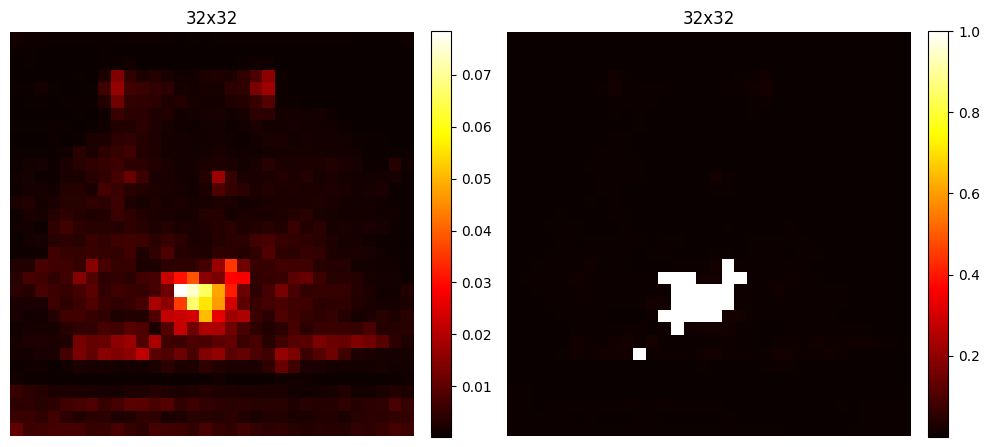

In [6]:
latents_40 = load_from_pkl(file_name="pkls_2/[32, 32, 77]_40 ")

modified_tensor, mask = zero_top_percent_with_mask(latents_40[:,:,5], 2.3)

plot_tensors_heatmaps(*(latents_40[:,:,5], modified_tensor), figsize=(10,10))

# save_as_pkl(mask,file_name="32")

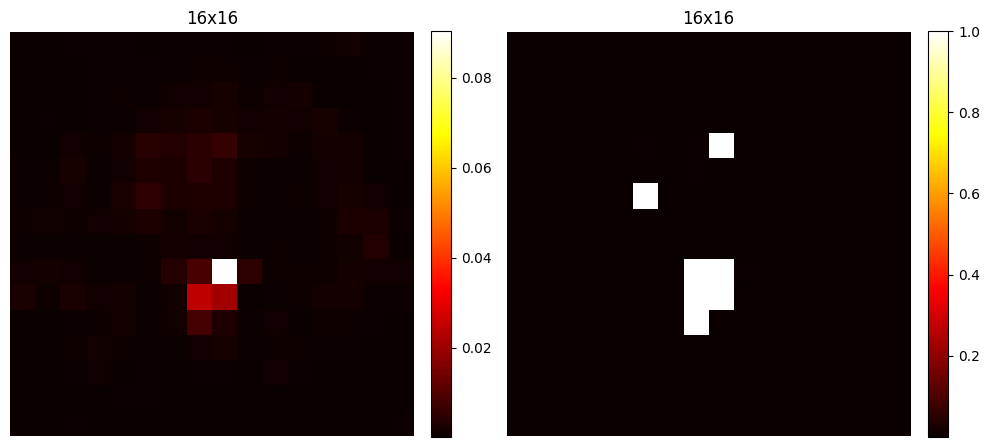

In [7]:
latents_40 = load_from_pkl(file_name="pkls_2/[16, 16, 77]_40 (5)")

modified_tensor, mask = zero_top_percent_with_mask(latents_40[:,:,5],3)

plot_tensors_heatmaps(*(latents_40[:,:,5],modified_tensor),figsize=(10,10))

# save_as_pkl(mask,file_name="16")
